In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')#reading the data from file
df.info() #looking data, if there are Null informations and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.describe() #this function help us to understand data more clear

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
correlation=df.corr()
print(correlation['Amount']) #looking correlation between each features with 'Amount'



Time     -0.010596
V1       -0.227709
V2       -0.531409
V3       -0.210880
V4        0.098732
V5       -0.386356
V6        0.215981
V7        0.397311
V8       -0.103079
V9       -0.044246
V10      -0.101502
V11       0.000104
V12      -0.009542
V13       0.005293
V14       0.033751
V15      -0.002986
V16      -0.003910
V17       0.007309
V18       0.035650
V19      -0.056151
V20       0.339403
V21       0.105999
V22      -0.064801
V23      -0.112633
V24       0.005146
V25      -0.047837
V26      -0.003208
V27       0.028825
V28       0.010258
Amount    1.000000
Class     0.005632
Name: Amount, dtype: float64


Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<Axes: title={'center': 'Class Distribution Plot'}, xlabel='Class', ylabel='Density'>

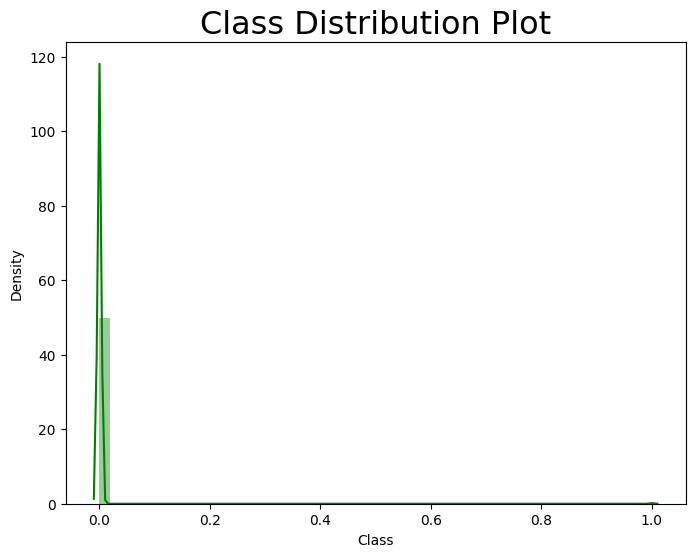

In [5]:
f1, ax = plt.subplots(figsize=(8, 6))
plt.title('Class Distribution Plot',fontsize=23)
sns.distplot(df['Class'], color='green')

Text(0.5, 0.98, 'Positive and Negative Correlation Visualizations')

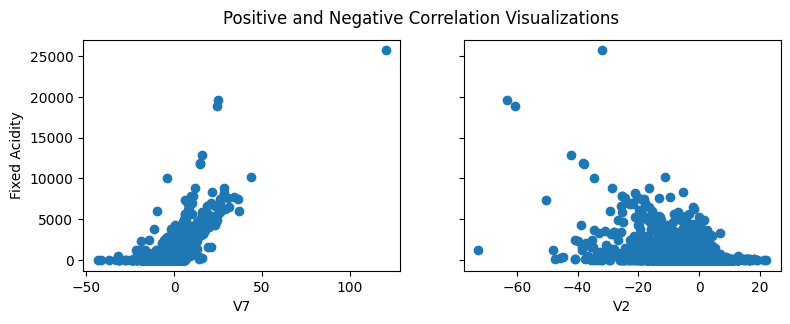

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True) 
axs[0].scatter(df["V7"].values, df["Amount"].values)
axs[0].set_xlabel('V7')
axs[0].set_ylabel('Fixed Acidity')                      # By looking at the correlation data we found above,we created the positive and negative correlation table using 'amount' feature. 
axs[1].scatter(df["V2"].values, df["Amount"].values)
axs[1].set_xlabel('V2')
fig.suptitle('Positive and Negative Correlation Visualizations')

In [7]:
scaler = StandardScaler()
df_dropped = df.drop('Class', axis=1)  #To use unsupervised learning technique we need to drop the 'Class' property to let the computer learn whether it is 'Fraud' or 'Not Fraud
X = df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)

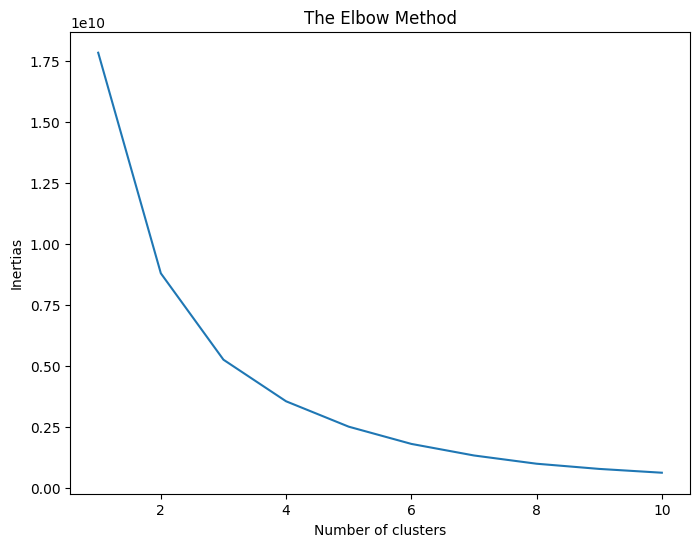

In [8]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)    #this code block help us to find the best k number for our model
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [9]:
model = KMeans(n_clusters=3)  #we get the k from above code block
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)

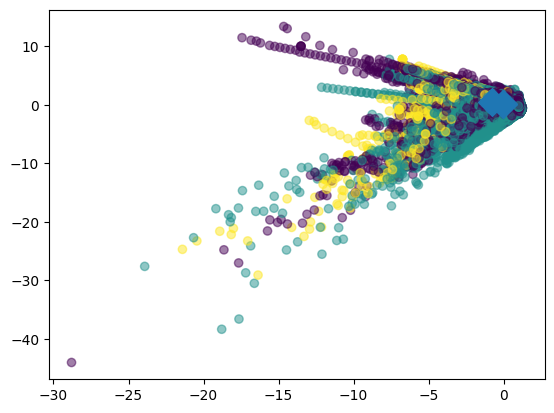

In [10]:
xs = test_points[:,0]
ys = test_points[:,1]
plt.scatter(xs, ys, c=labels, alpha=0.5)     #this code blocks shows us the clusters centroids
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

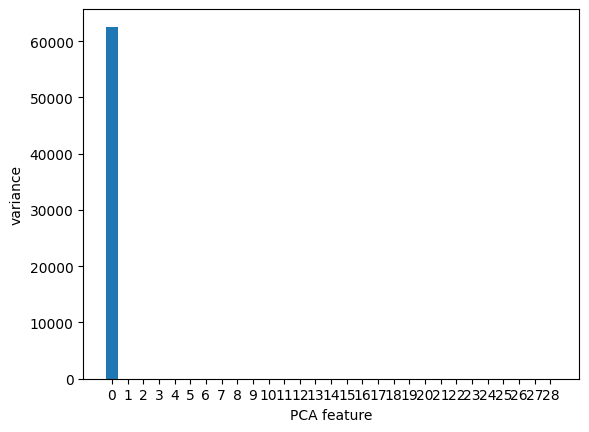

In [11]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)            #This code block helps us find which data affects our dataset the most
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [12]:
pca = PCA(n_components=1) #Because there is just 1 effect
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.99953802]
0.9995380163801827


This is the score that we get by using k-Means

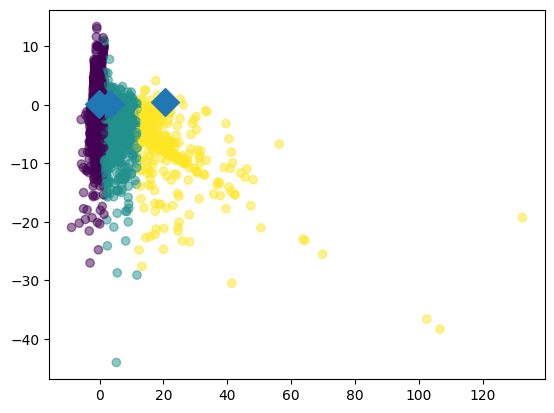

In [13]:
pca=PCA(n_components=1)
pca.fit(scaled_x)
pca_features=pca.transform(scaled_x)
model = KMeans(n_clusters=3)
training_points = pca_features[:1000]
test_points = pca_features[1000:]                       #this code blocks shows us the clusters centroids after using k-Means method
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()